In [1]:
import pandas as pd
import seaborn as sns

In [2]:
champs = pd.read_csv("/Users/cha/Desktop/Code/Datathon/data/champs_elysees.csv", sep=";")
convention = pd.read_csv("/Users/cha/Desktop/Code/Datathon/data/convention.csv", sep=";")
peres = pd.read_csv("/Users/cha/Desktop/Code/Datathon/data/st_peres.csv", sep=";")

champs = champs[(champs["Libelle noeud amont"] == "Av_Champs_Elysees-Washington") & (champs["Libelle noeud aval"] == "Av_Champs_Elysees-Berri")]
convention = convention[(convention["Libelle noeud amont"] == "Lecourbe-Convention") & (convention["Libelle noeud aval"] == "Convention-Blomet")]
peres = peres[(peres["Libelle noeud amont"] == "Sts_Peres-Voltaire") & (peres["Libelle noeud aval"] == "Sts_Peres-Universite")]

print("Champs data", len(champs))
print("Peres data", len(peres))
print("Convention data", len(convention))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cha/Desktop/Code/Datathon/data/champs_elysees.csv'

In [3]:
columns = [
    # 'Identifiant arc',
    # 'Libelle',
    'Date et heure de comptage',
    'Débit horaire',
    "Taux d'occupation",
    'Etat trafic',
    # 'Identifiant noeud amont',
    # 'Libelle noeud amont',
    # 'Identifiant noeud aval',
    # 'Libelle noeud aval',
    # 'Etat arc', invalide pour tous sauf champs ou il y a aussi Barré A VOIR
    # 'Date debut dispo data',
    # 'Date fin dispo data',
    # 'geo_point_2d', 48.871535879911605,2.301722792456062     7195 et 48.871535879911605,2.3017227924560624    1967
    # 'geo_shape' {"coordinates": [[2.3009951475, 48.8717770435], [2.3024504374, 48.8712947163]], "type": "LineString"} 7195 and{"coordinates": [[2.300995147533877, 48.871777043532866], [2.3024504373782473, 48.871294716290336]], "type": "LineString"}    1967
]

champs = champs[columns]
peres = peres[columns]
convention = convention[columns]

In [4]:
convention.head()

,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic
28,2021-12-02T21:00:00+01:00,683.0,4.35722,Fluide
29,2021-12-02T23:00:00+01:00,545.0,3.79334,Fluide
30,2021-12-02T16:00:00+01:00,982.0,9.22667,Fluide
31,2021-12-03T00:00:00+01:00,441.0,2.64722,Fluide
32,2021-12-02T14:00:00+01:00,793.0,5.16278,Fluide


<AxesSubplot: >

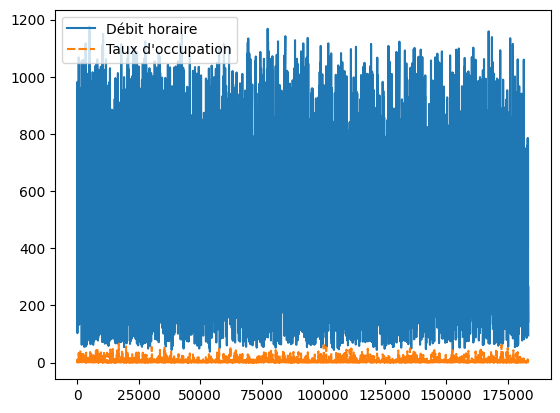

In [6]:
sns.lineplot(data=convention)

catégorie vacances:

- Départ weekend/vacances
- vacances, Été ?
- Jour de la semaine
- saison
- Moment de la journée